In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')

#**Data Exploration and Cleaning**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (545, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


No missing values and duplicates

Check for outliers

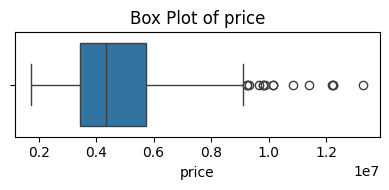

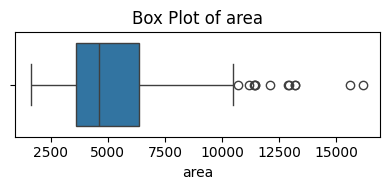

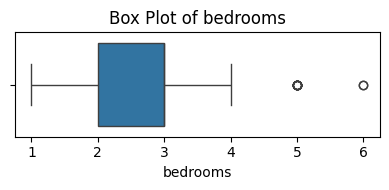

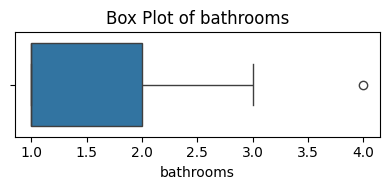

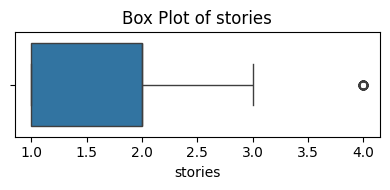

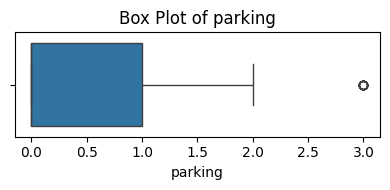

In [ ]:
columns_to_plot = ['price', 'area', 'bedrooms', 'bathrooms', 'stories',
                   'parking']


for column in columns_to_plot:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

In the image above, there is a significant outlier in the columns price and area

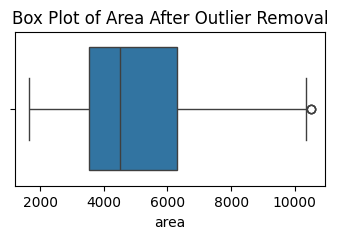

In [ ]:
# Area
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['area'] >= (Q1 - 1.5 * IQR)) & (df['area'] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df['area'])
plt.title('Box Plot of Area After Outlier Removal')
plt.show()


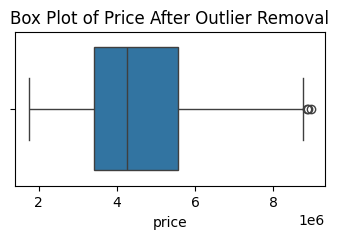

In [ ]:
#Price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price After Outlier Removal')
plt.show()

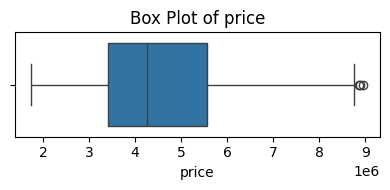

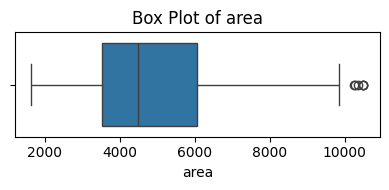

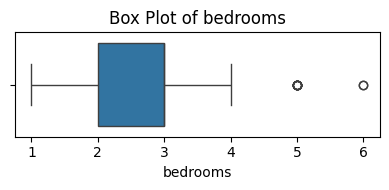

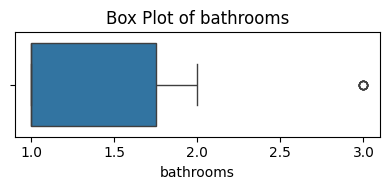

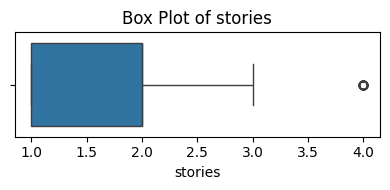

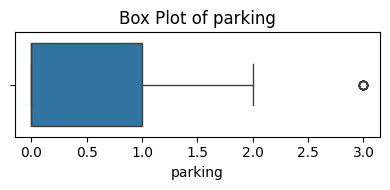

In [ ]:
#Check for outliers again
columns_to_plot = ['price', 'area', 'bedrooms', 'bathrooms', 'stories',
                   'parking']


for column in columns_to_plot:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

**Pairplot for numerical columns**

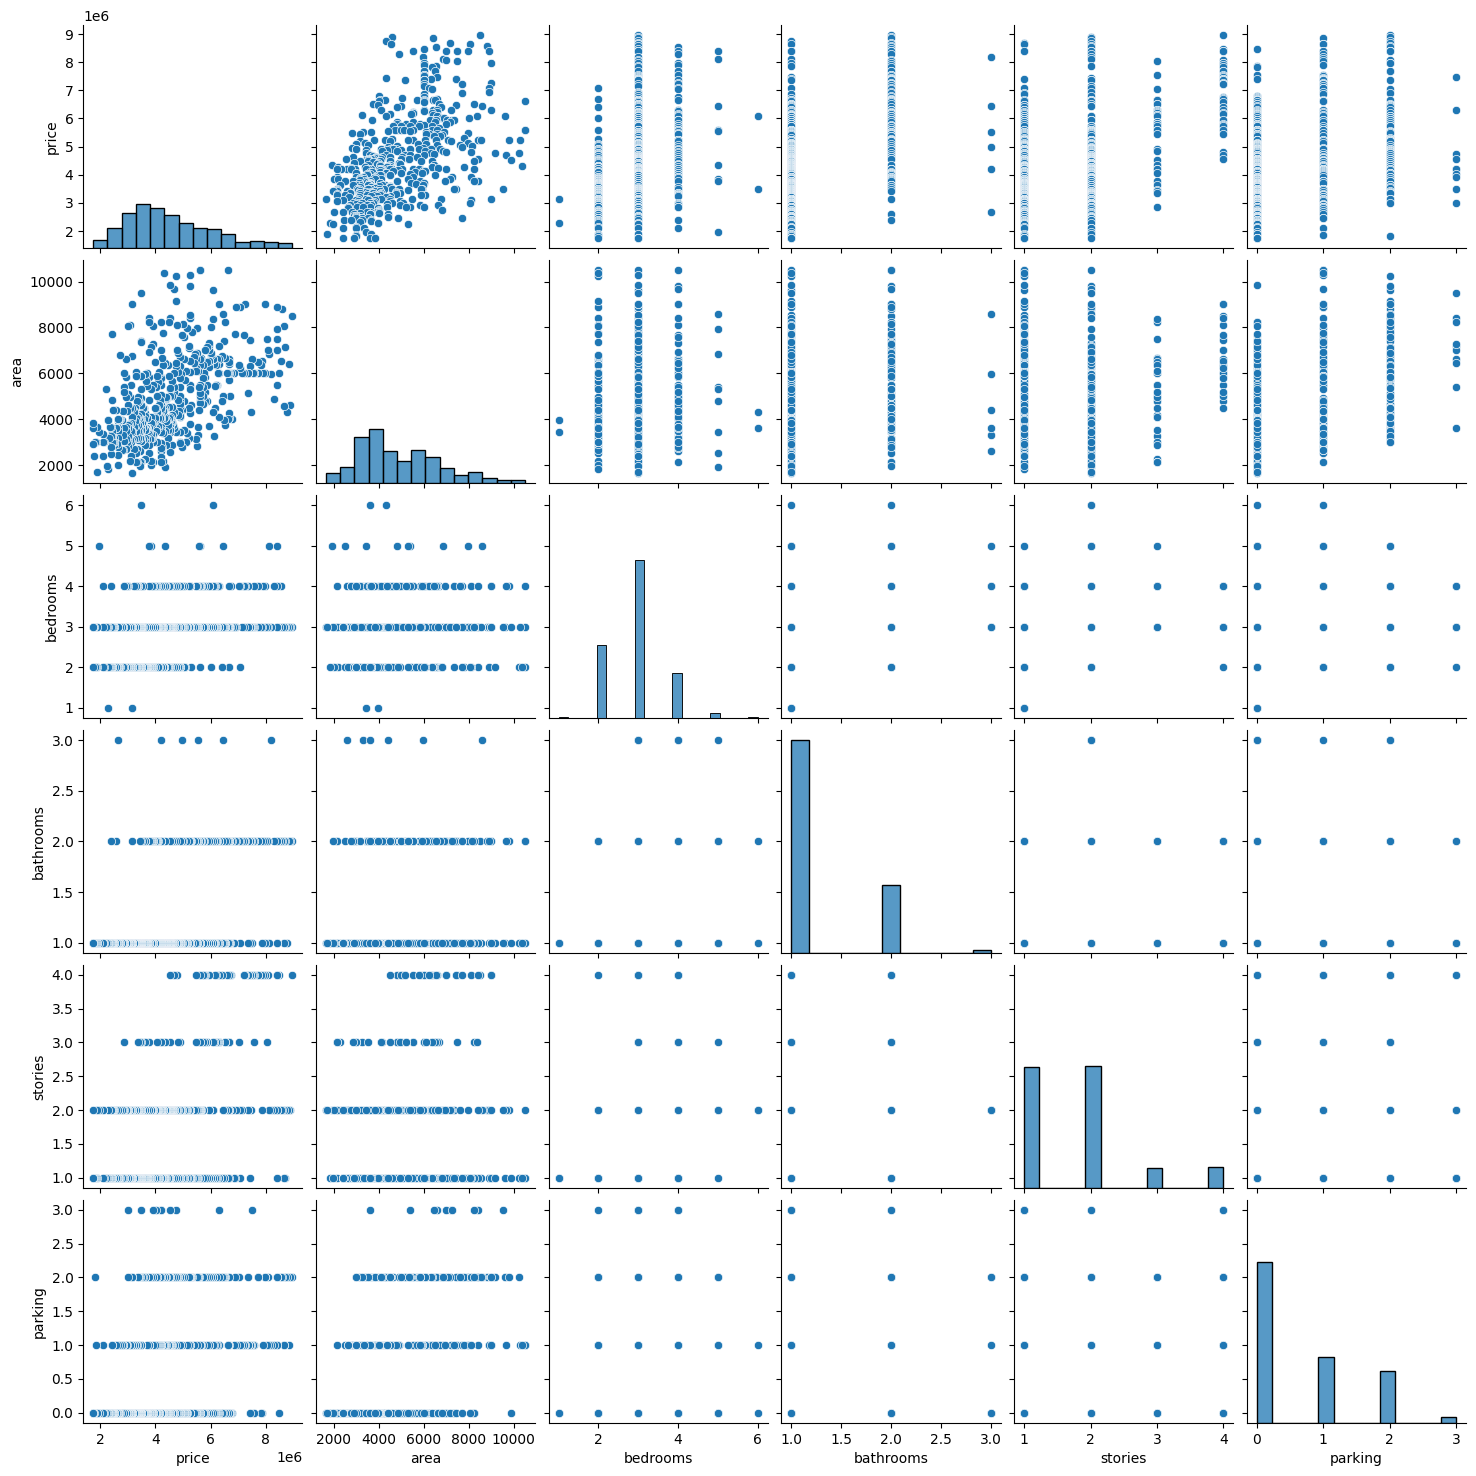

In [ ]:
sns.pairplot(df)
plt.show()

**Boxplot for categorical columns**

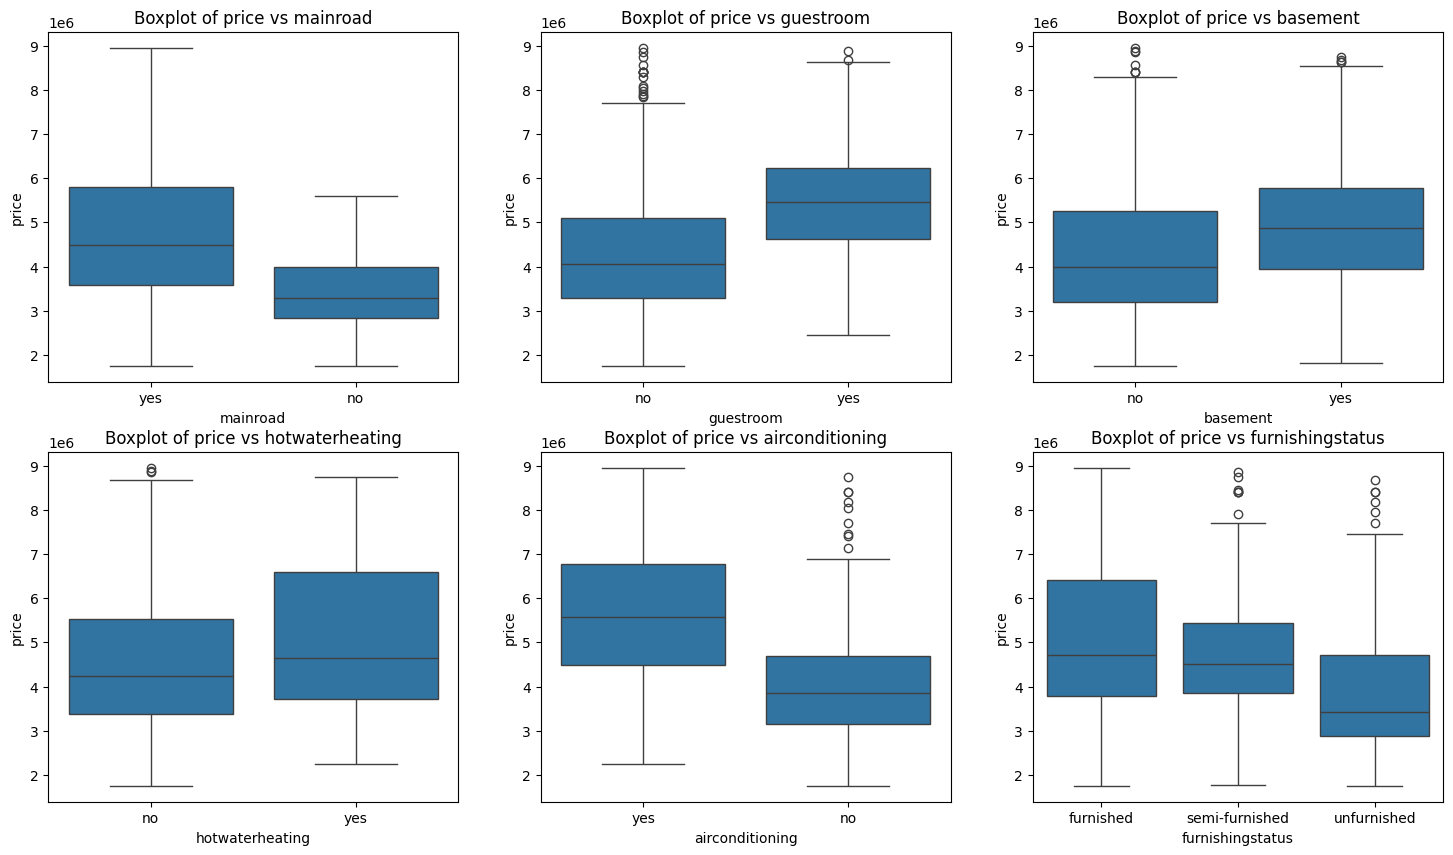

In [ ]:

features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Boxplot of price vs {feature}')
plt.show()

#**Feature selection**

The target variable is price

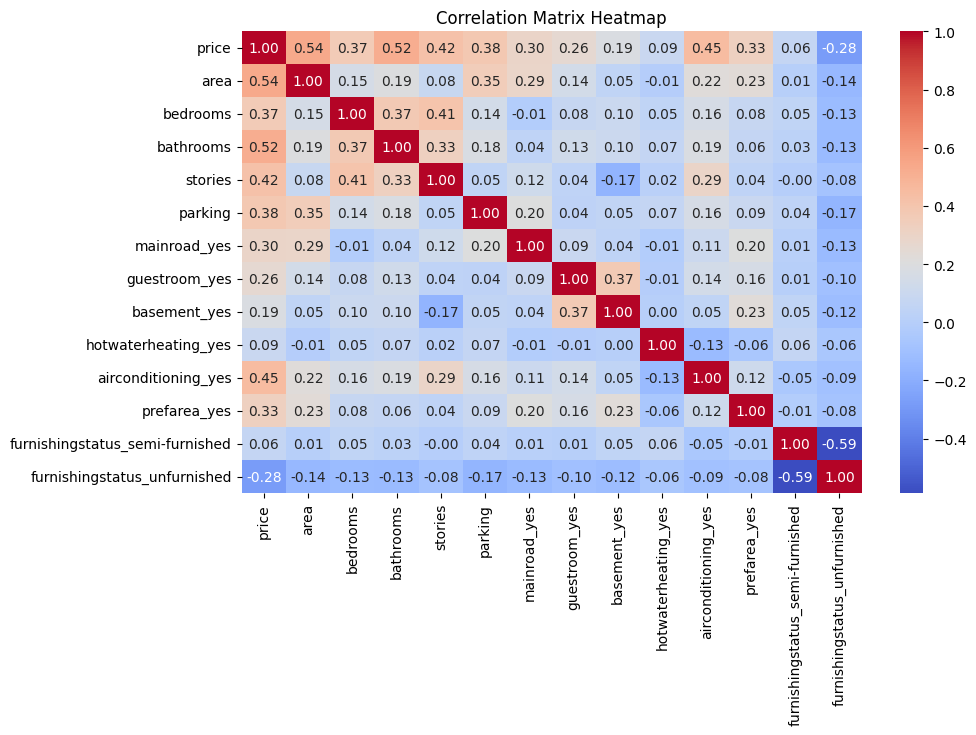

In [ ]:
housing_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = housing_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The features with the strongest positive correlations with the target variable "price" appear to be "area", "bathrooms", and "guestroom_yes".
The features with the strongest negative correlations with "price" seem to be "furnishingstatus_unfurnished" and "furnishingstatus_semi-furnished".

#**Prepare data for model training**

In [ ]:
# One-hot encode the categorical variables
housing_encoded = pd.get_dummies(df, columns=['guestroom', 'furnishingstatus'], drop_first=True)

# Selecting the relevant features
relevant_features = ['area', 'bathrooms', 'guestroom_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
X = housing_encoded[relevant_features]
y = housing_encoded['price']

# Splitting the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#**Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.46
Mean Squared Error: 1915080852900.99


The R-squared value indicates that 46% of the variance in the target variable price is explained by the model. This is a moderate performance but there is room for improvement.

The MSE value is quite high indicating that the model predictions are far from the actual prices. Thus, the model needs improvement. This can be done by adding more features.

In [ ]:
#model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for i, feature in enumerate(relevant_features):
    print(f"{feature}: {coefficients[i]:.2f}")
print(f"Intercept: {intercept:.2f}")

Model Coefficients:
area: 351.49
bathrooms: 1571134.51
guestroom_yes: 636048.06
furnishingstatus_semi-furnished: -270862.60
furnishingstatus_unfurnished: -765676.68
Intercept: 1211954.92


Let's add more relevant features because while some relationships are explained, there is still some some unexplained varaince

In [ ]:
# One-hot encode the categorical variables
housing_encoded = pd.get_dummies(df, columns=['guestroom', 'furnishingstatus','basement','mainroad'], drop_first=True)

# Selecting the relevant features
relevant_features = ['area', 'bathrooms','bedrooms','parking', 'guestroom_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'basement_yes', 'mainroad_yes']
X = housing_encoded[relevant_features]
y = housing_encoded['price']

# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.52
Mean Squared Error: 1693848587180.03


In [ ]:
# model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for i, feature in enumerate(relevant_features):
    print(f"{feature}: {coefficients[i]:.2f}")
print(f"Intercept: {intercept:.2f}")

Model Coefficients:
area: 272.94
bathrooms: 1408745.14
bedrooms: 304334.19
parking: 262642.55
guestroom_yes: 531930.48
furnishingstatus_semi-furnished: -243369.54
furnishingstatus_unfurnished: -616711.26
basement_yes: 193182.70
mainroad_yes: 817047.07
Intercept: -77031.06


The R² value has increased to 0.52, meaning that approximately 52% of the variability in housing prices can now be explained by the model. This is an improvement over the previous model, indicating that the additional features are helping to better capture the relationships in the data.

Mean Squared Error
Interpretation: The MSE has decreased, suggesting that the predictions are closer to the actual prices compared to the previous model. A lower MSE indicates improved model performance.

Let's add more features

In [ ]:

housing_encoded = pd.get_dummies(df, columns=['guestroom', 'furnishingstatus','basement','mainroad', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

relevant_features = ['area', 'bathrooms','stories','bedrooms','parking', 'guestroom_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'basement_yes', 'mainroad_yes', 'hotwaterheating_yes','airconditioning_yes', 'prefarea_yes' ]
X = housing_encoded[relevant_features]
y = housing_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for i, feature in enumerate(relevant_features):
    print(f"{feature}: {coefficients[i]:.2f}")
print(f"Intercept: {intercept:.2f}")


R-squared: 0.68
Mean Squared Error: 1127125806714.59
Model Coefficients:
area: 243.46
bathrooms: 1137441.33
stories: 405895.44
bedrooms: 90722.75
parking: 241872.95
guestroom_yes: 384897.46
furnishingstatus_semi-furnished: -101979.02
furnishingstatus_unfurnished: -427196.80
basement_yes: 277737.76
mainroad_yes: 575124.38
hotwaterheating_yes: 847855.38
airconditioning_yes: 845077.64
prefarea_yes: 604469.54
Intercept: -26580.44


With an R² of 0.68, approximately 68% of the variability in housing prices can be explained by the model. This indicates a strong fit and suggests that the model is effectively capturing the relationships between the features and the target variable.

The MSE has decreased again indicating that the predictions are getting closer to the actual prices.

#**Feature importance analysis**

In [ ]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients['Absolute'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute', ascending=False)

print(coefficients)

                                  Coefficient      Absolute
bathrooms                        1.137441e+06  1.137441e+06
hotwaterheating_yes              8.478554e+05  8.478554e+05
airconditioning_yes              8.450776e+05  8.450776e+05
prefarea_yes                     6.044695e+05  6.044695e+05
mainroad_yes                     5.751244e+05  5.751244e+05
furnishingstatus_unfurnished    -4.271968e+05  4.271968e+05
stories                          4.058954e+05  4.058954e+05
guestroom_yes                    3.848975e+05  3.848975e+05
basement_yes                     2.777378e+05  2.777378e+05
parking                          2.418730e+05  2.418730e+05
furnishingstatus_semi-furnished -1.019790e+05  1.019790e+05
bedrooms                         9.072275e+04  9.072275e+04
area                             2.434617e+02  2.434617e+02


In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
perm_importance = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance'])
perm_importance = perm_importance.sort_values(by='Importance', ascending=False)

print(perm_importance)

                                 Importance
area                               0.156343
bathrooms                          0.096897
airconditioning_yes                0.094420
stories                            0.075877
prefarea_yes                       0.048415
parking                            0.030563
furnishingstatus_unfurnished       0.027988
basement_yes                       0.011763
bedrooms                           0.005808
guestroom_yes                      0.002437
mainroad_yes                       0.002034
hotwaterheating_yes                0.001392
furnishingstatus_semi-furnished   -0.002453


From the above analysis, we can see that area has the highest importance score suggesting that it is the most infulential feature in predicting house prices.

bathrooms, aircinditioning_yes, and stories also have are important as they have a postive impact, suggesting that these factors make for a high valued home.

mainroad_yes, hotwaterheating_yes, and  guestroom_yes have a lower score indicating that their impact on house prices are negligible.

furnishingstatus_semi-furnished has a negative score suggesting that semi-furnished houses are not preffered.



#**Feature Selection: removing features with low importance to simplify the model and reduce overfitting.**

In [ ]:
housing_encoded = pd.get_dummies(df, columns=['guestroom', 'furnishingstatus', 'airconditioning', 'prefarea'], drop_first=True)

relevant_features = ['area', 'bathrooms','stories','parking', 'furnishingstatus_unfurnished','airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished' ]
X = housing_encoded[relevant_features]
y = housing_encoded['price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for i, feature in enumerate(relevant_features):
    print(f"{feature}: {coefficients[i]:.2f}")
print(f"Intercept: {intercept:.2f}")


R-squared: 0.68
Mean Squared Error: 1137446107703.20
Model Coefficients:
area: 276.44
bathrooms: 1233473.11
stories: 424161.17
parking: 273912.49
furnishingstatus_unfurnished: -524356.16
airconditioning_yes: 800062.66
prefarea_yes: 736961.20
furnishingstatus_semi-furnished: -104461.58
Intercept: 612726.36


#**Relationship between predicited and actual values.**

In [ ]:
predictions = model.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

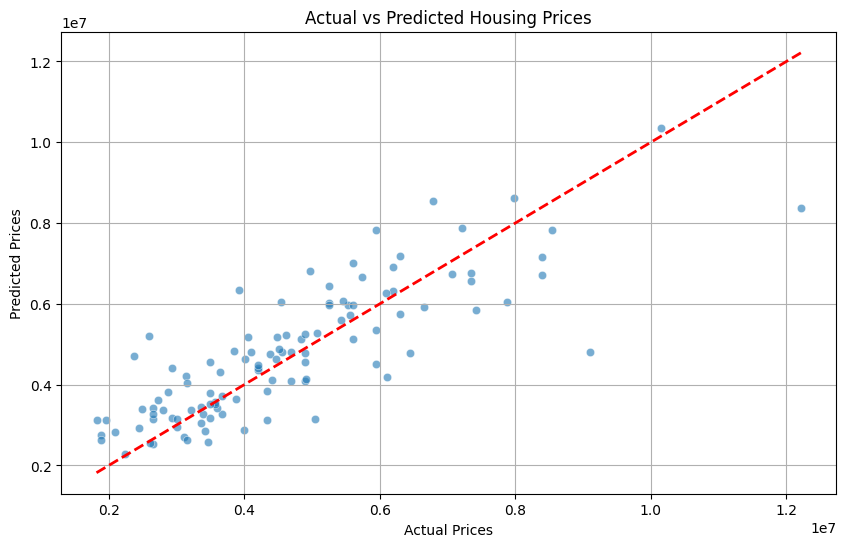

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Actual', y='Predicted', alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         'r--', lw=2)
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

Scatter Plot: This plot shows how closely the predicted values match the actual values. A perfect model would have all points on the diagonal line.

The plot suggests that the model's predicitions generally align with the actual prices, although some points deviate from the red line. This indicates that there is still room for improvement.

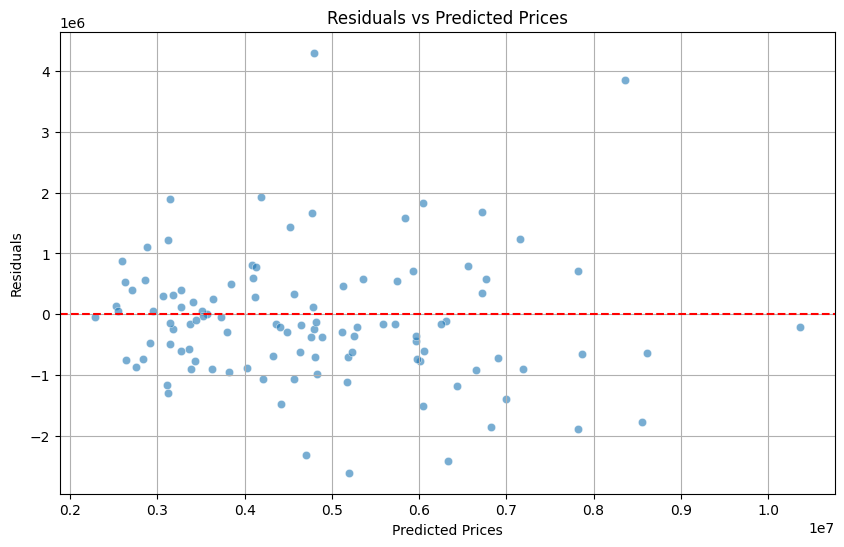

In [ ]:
residuals = results['Actual'] - results['Predicted']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Predicted'], y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid()
plt.show()

This plot helps identify any patterns in the residuals. Ideally, residuals should be randomly distributed around zero, indicating a good model fit.

We can see that the residuals are randomly scattered around 0 which is good. There are a few residuals that are further away from 0 but overall the model is performing relatively well.